# Machine Learning - Supervised learning, classification single class
Training classification models with `sklearn`

<img src="https://peru21.pe/resizer/LTsRiZF1dEc2cJA_Vjf4YwrDTFU=/980x528/smart/arc-anglerfish-arc2-prod-elcomercio.s3.amazonaws.com/public/VEFE6S2LVRCYBK2BRN6ZLOV2WU.jpg" width="400">

In [1]:
import pandas as pd

df = pd.read_csv("data/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Feature vector 
X = df[["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]]

print(X["Embarked"].value_counts())

# GroundTruth
y = df["Survived"] 

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [3]:
import numpy as np
X["Cabin"] = np.where(X["Cabin"].isnull(),0,1)
X["Cabin"].value_counts()


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    687
1    204
Name: Cabin, dtype: int64

In [24]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,0,S
1,1,female,38.0,1,0,71.2833,1,C
2,3,female,26.0,0,0,7.9250,0,S
3,1,female,35.0,1,0,53.1000,1,S
4,3,male,35.0,0,0,8.0500,0,S


In [30]:
X = pd.get_dummies(X)

In [31]:
X["Age"].fillna(X["Age"].mean(), inplace=True)
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [34]:
print(X.dtypes)
X

Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Cabin           int64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object


,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,1,0,1,0,0
2,3,26.000000,0,0,7.9250,0,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,1,0,0,0,1
888,3,29.699118,1,2,23.4500,0,1,0,0,0,1
889,1,26.000000,0,0,30.0000,1,0,1,1,0,0


## Preprocessing pipeline


Normalizer, StandardScaler, Mean Removal, PCA
- https://scikit-learn.org/stable/modules/preprocessing.html

Making a Sklearn `pipeline`
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

In [5]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

Xpr = tr.fit_transform(X)
Xpr = pd.DataFrame(Xpr,columns=X.columns)

ValueError: could not convert string to float: 'Q'

In [44]:
Xpr.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.424685,-0.304114,0.222149,-0.243132,-0.257900,-0.279705,-0.378652,0.378652,-0.247428,-0.157869,0.317884
1,-0.369754,0.150816,0.102181,-0.111833,0.185772,0.433266,0.320047,-0.320047,0.489785,-0.072615,-0.381229
2,0.333991,-0.114911,-0.191562,-0.191210,-0.197338,-0.219972,0.547211,-0.547211,-0.194588,-0.124155,0.249998
3,-0.473036,0.123212,0.130724,-0.143071,0.127080,0.554289,0.409446,-0.409446,-0.145599,-0.092898,0.187059
4,0.434089,0.214021,-0.248973,-0.248516,-0.255160,-0.285898,-0.387036,0.387036,-0.252907,-0.161365,0.324923


## Custom pipeline in sklearn
```python
from sklearn.base import BaseEstimator, TransformerMixin

class MyCleaner(TransformerMixin):
    def __init__(self,):
        pass
    def fit(self, X, y):
        pass
    def transform(self, x):
        pass
```

In [9]:
from sklearn.base import TransformerMixin

# This class receives original dataframe and cleans the data
class CleanTitanic(TransformerMixin):
    def __init__(self):
        self.features =["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]
    
    def fit(self, X):
        # Get only intereesting data 
        X = df[self.features]
        # Clean age feature and put the mean on missing values
        X["Age"].fillna(X["Age"].mean(), inplace=True)
        # Clean cabin data
        X["Cabin"] = np.where(X["Cabin"].isnull(),0,1)
        self.X = pd.get_dummies(X)
        self.cols = self.X.columns
        return self
    
    def transform(self, df):
        return self.X

cleaner = CleanTitanic()
pipe = make_pipeline(*[
    cleaner,
    StandardScaler(),
    Normalizer(),
])

data = pd.read_csv("data/titanic/train.csv")

X = pipe.fit_transform(data)
X = pd.DataFrame(X,columns=cleaner.cols)
y = data["Survived"]
df_export = X.copy()
df_export['y'] = y
df_export.to_csv("data/titanic_feats.csv", index=False)
display(X.head())

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.424685,-0.304114,0.222149,-0.243132,-0.257900,-0.279705,-0.378652,0.378652,-0.247428,-0.157869,0.317884
1,-0.369754,0.150816,0.102181,-0.111833,0.185772,0.433266,0.320047,-0.320047,0.489785,-0.072615,-0.381229
2,0.333991,-0.114911,-0.191562,-0.191210,-0.197338,-0.219972,0.547211,-0.547211,-0.194588,-0.124155,0.249998
3,-0.473036,0.123212,0.130724,-0.143071,0.127080,0.554289,0.409446,-0.409446,-0.145599,-0.092898,0.187059
4,0.434089,0.214021,-0.248973,-0.248516,-0.255160,-0.285898,-0.387036,0.387036,-0.252907,-0.161365,0.324923


In [100]:
print(X.shape,y.shape)

(891, 11) (891,)


# Our first linear model
 
 <div style="text-align:center">
    <img src="https://thumbs.gfycat.com/RaggedShorttermHalcyon-size_restricted.gif" width="200" style="display:inline-block"/>
    <img src="https://ldapwiki.com/attach/Logistic%20function/LogReg_1.png" width="500" style="display:inline-block"/>
</div>

**Linear** and **Logistic** regression are the most basic form of regression which are commonly used. The essential difference between these two is that Logistic regression is used when the dependent variable is binary in nature. In contrast, Linear regression is used when the dependent variable is continuous and nature of the regression line is linear.

1. In case of **Linear Regression** the outcome is *continuous* while in case of **Logistic Regression** outcome is *discrete* (not continuous)
2. To perform Linear regression we require a linear relationship between the dependent and independent variables. But to perform Logistic regression we do not require a linear relationship between the dependent and independent variables.
3. Linear Regression is all about fitting a straight line in the data while Logistic Regression is about fitting a curve to the data.
4. Linear Regression is a regression algorithm for Machine Learning while Logistic Regression is a classification Algorithm for machine learning.
5. Linear regression **assumes gaussian (or normal) distribution** of dependent variable. Logistic regression **assumes binomial distribution** of dependent variable.


## Logistic regression

`from sklearn.linear_model import LogisticRegression`

Refs:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://techdifferences.com/difference-between-linear-and-logistic-regression.html
- https://stackoverflow.com/questions/12146914/what-is-the-difference-between-linear-regression-and-logistic-regression

## Spliting into train and test data

<img src="https://miro.medium.com/max/948/1*4G__SV580CxFj78o9yUXuQ.png" width="450"/>

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [106]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="lbfgs")

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0
 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0]


In [112]:
result = pd.DataFrame({
    "y_pred":y_pred,
    "gt":y_test
})

In [118]:
print(len(y_pred))
1-np.abs(y_pred-y_test).sum()/len(y_pred)

179


0.8044692737430168

In [120]:
model.predict_proba(X_test)

array([[0.86673391, 0.13326609],
       [0.62609169, 0.37390831],
       [0.40826712, 0.59173288],
       [0.85562493, 0.14437507],
       [0.88470832, 0.11529168],
       [0.78947767, 0.21052233],
       [0.68737692, 0.31262308],
       [0.86598382, 0.13401618],
       [0.59098363, 0.40901637],
       [0.21925337, 0.78074663],
       [0.84789955, 0.15210045],
       [0.19429231, 0.80570769],
       [0.93157304, 0.06842696],
       [0.87288372, 0.12711628],
       [0.93836451, 0.06163549],
       [0.44720994, 0.55279006],
       [0.37910098, 0.62089902],
       [0.94250484, 0.05749516],
       [0.14163988, 0.85836012],
       [0.92578739, 0.07421261],
       [0.25204744, 0.74795256],
       [0.89290464, 0.10709536],
       [0.90836732, 0.09163268],
       [0.27247386, 0.72752614],
       [0.94174607, 0.05825393],
       [0.41185624, 0.58814376],
       [0.87850869, 0.12149131],
       [0.81966815, 0.18033185],
       [0.84227146, 0.15772854],
       [0.88063919, 0.11936081],
       [0.

## Feature selection

`sklearn.feature_selection.SelectKBest`: Select features according to the k highest scores depending on statistical test.

`from sklearn.feature_selection import chi2`
**Chi Squared test**: In the standard applications of this test, the observations are classified into mutually exclusive classes. If the so-called null hypothesis is true, the test statistic computed from the observations follows a χ2 distribution. The purpose of the test is to evaluate how likely the observed frequencies would be assuming the null hypothesis is true. **Test statistics that follow a χ2 distribution occur when the observations are independent and normally distributed**


- https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [139]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

featurer = SelectKBest(chi2, k=4)
X_new = featurer.fit_transform(np.abs(X), y)

In [141]:
print(X.columns[featurer.get_support()])
#X_new

Index(['Pclass', 'SibSp', 'Cabin', 'Embarked_Q'], dtype='object')


## Basic metrics

- AUC & Roc Curve:  http://arogozhnikov.github.io/2015/10/05/roc-curve.html

,predicted,probaLife,probaDead
709,1,0.133266,0.866734
270,0,0.373908,0.626092
18,0,0.591733,0.408267
178,0,0.144375,0.855625
48,0,0.115292,0.884708


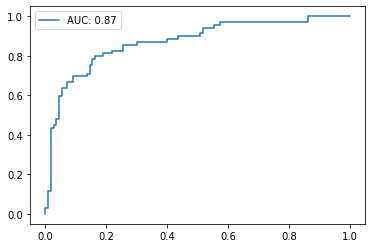

In [122]:
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_score = model.predict_proba(X_test)

roc = roc_curve(y_test, y_score[:,1])
display(pd.DataFrame({
    "predicted":y_test,
    "probaLife":y_score[:,1],
    "probaDead":y_score[:,0]
}).head())

plt.plot(roc[0],roc[1])
plt.legend([f"AUC: {round(roc_auc_score(y_test, y_score[:,1]),2)}"])

## Labs

- [Basic]: https://github.com/ironhack-datalabs/datamad0120/tree/master/module-3/lab-supervised-learning-feature-extraction
- [Normal]: https://github.com/ironhack-datalabs/datamad0120/blob/master/module-3/lab-supervised-learning-sklearn/your-code/main.ipynb
- [Advanced]: https://github.com/ironhack-datalabs/datamad0120/blob/master/module-3/lab-supervised-learning/your-code/main.ipynb